In [1]:
# 6 train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at 6 line only
six_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('6')]

In [5]:
# look at all station names
six_train_all['STATION'].unique()

array(['103 ST', '110 ST', '116 ST', '125 ST', '14 ST-UNION SQ', '23 ST',
       '3 AV 138 ST', '33 ST', '51 ST', '59 ST', '68ST-HUNTER CO',
       '77 ST', '86 ST', '96 ST', 'ASTOR PL', "B'WAY-LAFAYETTE",
       'BLEECKER ST', 'BROOK AV', 'BROOKLYN BRIDGE', 'BUHRE AV',
       'CANAL ST', 'CASTLE HILL AV', 'CHAMBERS ST', 'CYPRESS AV',
       "E 143/ST MARY'S", 'E 149 ST', 'ELDER AV', 'GRD CNTRL-42 ST',
       'HUNTS POINT AV', 'LEXINGTON AV/53', 'LONGWOOD AV',
       'MIDDLETOWN RD', 'MORISN AV/SNDVW', 'PARKCHESTER',
       'PELHAM BAY PARK', 'SPRING ST', 'ST LAWRENCE AV', 'WESTCHESTER SQ',
       'WHITLOCK AV', 'ZEREGA AV'], dtype=object)

In [6]:
# check station count
six_train_all['STATION'].count()

42

In [8]:
# needs further cleaning
six_train_all["STATION"].replace("LEXINGTON AV/53", value="51 ST", inplace=True)
six_train_all["STATION"].replace("CHAMBERS ST", value="BROOKLYN BRIDGE", inplace=True)
six_train_all["STATION"].replace("BLEECKER ST", value="B'WAY-LAFAYETTE", inplace=True)

In [10]:
# now sum same name rows
six_commuters = six_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
six_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
103 ST,8439.0,7932.0
110 ST,4461.0,2436.0
116 ST,10861.0,5267.0
125 ST,20342.0,18847.0
14 ST-UNION SQ,17962.0,48134.0


In [11]:
# order stations in excel
# save as csv
six_commuters.to_csv('six_commuters.csv')

In [12]:
# open ordered CSV
csv_path_6 = 'six_commuters_order.csv'
six_commuters_order = pd.read_csv(csv_path_6, encoding="utf-8")
six_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,PELHAM BAY PARK,6054,1063
1,BUHRE AV,8120,933
2,MIDDLETOWN RD,4159,779
3,WESTCHESTER SQ,3729,1515
4,ZEREGA AV,4350,1764


In [13]:
six_commuters_order['AM_AVG_ENTER'] = six_commuters_order['AM_ENTERS']/5

In [14]:
six_commuters_order['AM_AVG_EXIT'] = six_commuters_order['AM_EXITS']/5
six_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,PELHAM BAY PARK,6054,1063,1210.8,212.6
1,BUHRE AV,8120,933,1624.0,186.6
2,MIDDLETOWN RD,4159,779,831.8,155.8
3,WESTCHESTER SQ,3729,1515,745.8,303.0
4,ZEREGA AV,4350,1764,870.0,352.8


In [15]:
# order stations in excel
# save as csv
six_commuters_order.to_csv('six_commuters_final.csv')

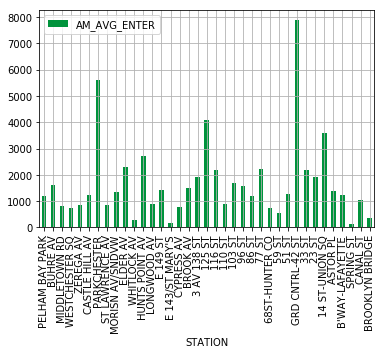

In [16]:
# graph 6 Train AM AVG ENTERS
plt = six_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('6-AM-enter.pdf')

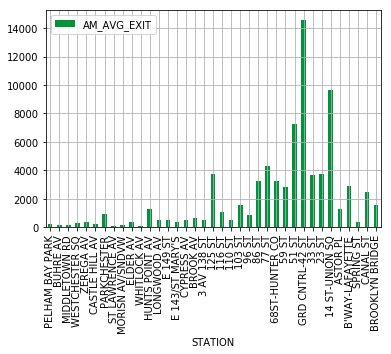

In [17]:
# graph 6 Train AM AVG EXITS
plt = six_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#00933C')
plt.grid()

# save the fig
plt.figure.savefig('6-AM-exit.pdf')